# Image scaling test
Several online sources have noted a defect in the behaviour of the `tf.image.resize` method, in that it shifts the up or downscaled image by a pixel and crops:
 * https://hackernoon.com/how-tensorflows-tf-image-resize-stole-60-days-of-my-life-aba5eb093f35
 * https://stackoverflow.com/questions/55407551/tensorflow-does-tf-image-resize-still-not-align-corners

A small synthetic image is used for testing. The following libraries will be compared for up- and down-scaling:
 * `tensorflow`
 * `PIL`
 * `scikit-image`


In [1]:
# Imports.
import os
import imageio
import numpy as np
import pandas as pd

import tensorflow as tf
import PIL
import skimage
from skimage.transform import resize, rescale, downscale_local_mean

# Custom imports.
import site
site.addsitedir('../../sr-tools')

from sr_tools.visual.display import im_show, n_compare

print("Library versions compared:")
print(f"\t   TesorFlow: {tf.__version__}")
print(f"\t         PIL: {PIL.__version__}")
print(f"\tScikit-Image: {skimage.__version__}")

Library versions compared:
	   TesorFlow: 2.3.1
	         PIL: 8.0.0
	Scikit-Image: 0.17.2


---
## Import test image

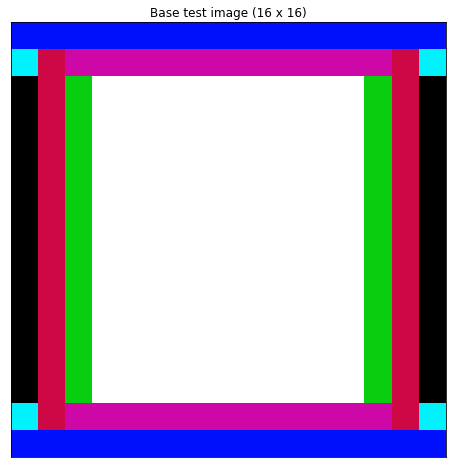

In [2]:
image_path = "scaling_test_16x16.png"
test_image = np.clip(imageio.imread(image_path), a_min=0, a_max=255)
im_show(test_image, label=f'Base test image ({test_image.shape[1]} x {test_image.shape[0]})')

---
## Comparison
### 2x Downscaling

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


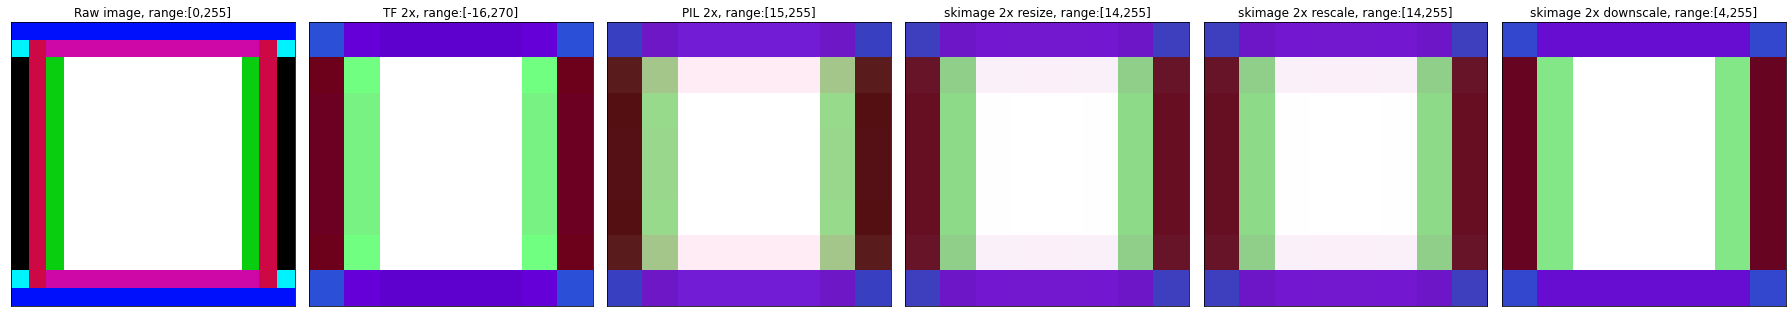

In [3]:
scaling = 2

tf_bicubic = np.array(tf.image.resize(test_image, size=[16//scaling,16//scaling], method='bicubic')).astype(int)
pil_bicubic = np.array(PIL.Image.fromarray(np.uint8(test_image)).convert('RGB').resize(size=[16//scaling,16//scaling], resample=PIL.Image.BICUBIC)).astype(int)
sk_resize = (resize(test_image, [16//scaling,16//scaling])*255.0).astype(int)
sk_rescale = (rescale(test_image, scale=(1/scaling, 1/scaling, 1))*255.0).astype(int)
sk_ds = downscale_local_mean(test_image, factors=(scaling, scaling, 1)).astype(int)

n_compare(
    im_list=[test_image, tf_bicubic, pil_bicubic, sk_resize, sk_rescale, sk_ds],
    label_list=[f'Raw image, range:[{test_image.min()},{test_image.max()}]',
                f'TF {scaling}x, range:[{tf_bicubic.min()},{tf_bicubic.max()}]',
                f'PIL {scaling}x, range:[{pil_bicubic.min()},{pil_bicubic.max()}]',
                f'skimage {scaling}x resize, range:[{sk_resize.min()},{sk_resize.max()}]',
                f'skimage {scaling}x rescale, range:[{sk_rescale.min()},{sk_rescale.max()}]',
                f'skimage {scaling}x downscale, range:[{sk_ds.min()},{sk_ds.max()}]'],
    figsize=(25,15)
)

### 3x Downscaling

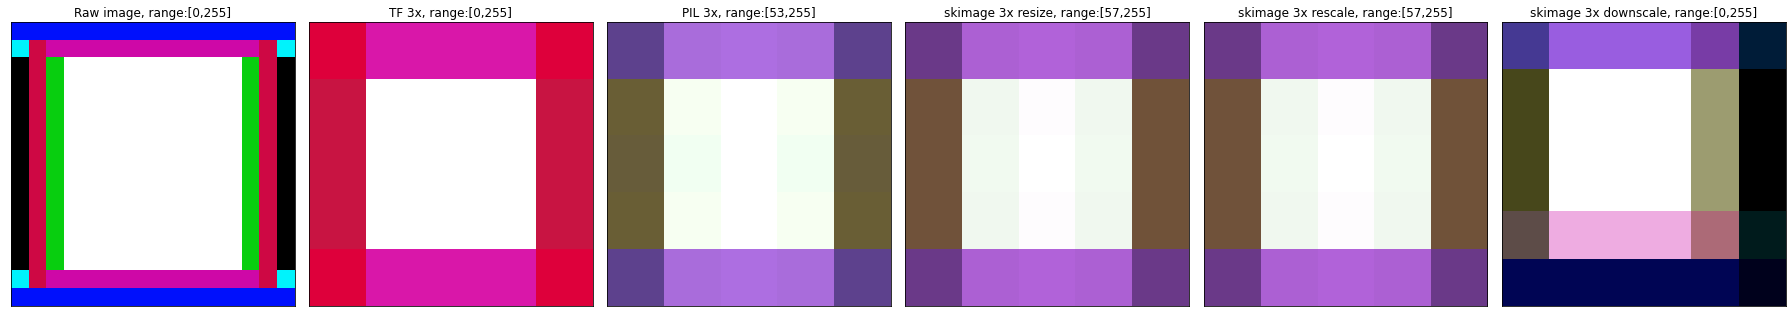

In [4]:
scaling = 3

tf_bicubic = np.array(tf.image.resize(test_image, size=[16//scaling,16//scaling], method='bicubic')).astype(int)
pil_bicubic = np.array(PIL.Image.fromarray(np.uint8(test_image)).convert('RGB').resize(size=[16//scaling,16//scaling], resample=PIL.Image.BICUBIC)).astype(int)
sk_resize = (resize(test_image, [16//scaling,16//scaling])*255.0).astype(int)
sk_rescale = (rescale(test_image, scale=(1/scaling, 1/scaling, 1))*255.0).astype(int)
sk_ds = downscale_local_mean(test_image, factors=(scaling, scaling, 1)).astype(int)

n_compare(
    im_list=[test_image, tf_bicubic, pil_bicubic, sk_resize, sk_rescale, sk_ds],
    label_list=[f'Raw image, range:[{test_image.min()},{test_image.max()}]',
                f'TF {scaling}x, range:[{tf_bicubic.min()},{tf_bicubic.max()}]',
                f'PIL {scaling}x, range:[{pil_bicubic.min()},{pil_bicubic.max()}]',
                f'skimage {scaling}x resize, range:[{sk_resize.min()},{sk_resize.max()}]',
                f'skimage {scaling}x rescale, range:[{sk_rescale.min()},{sk_rescale.max()}]',
                f'skimage {scaling}x downscale, range:[{sk_ds.min()},{sk_ds.max()}]'],
    figsize=(25,15)
)

### 4x Downscaling

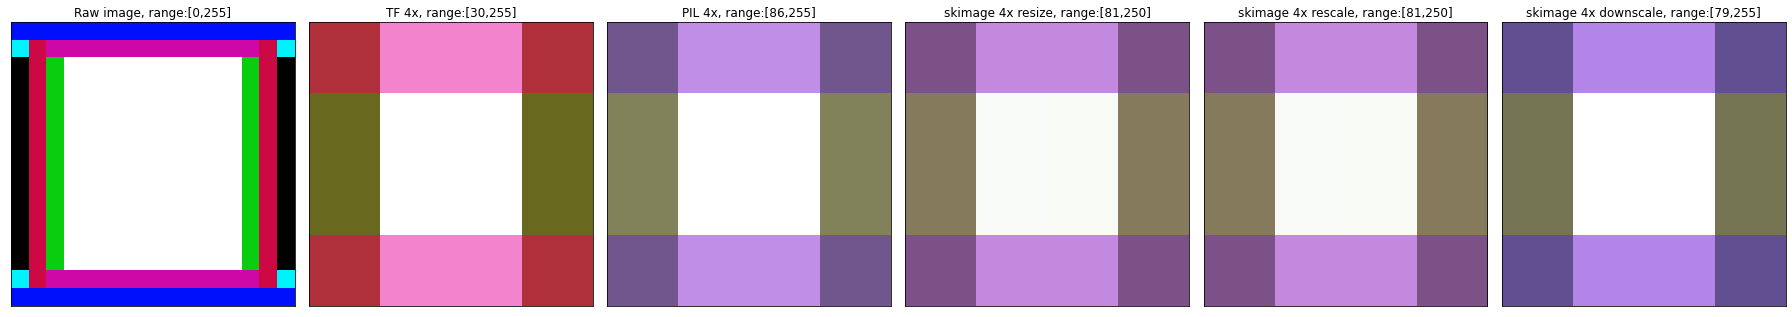

In [5]:
scaling = 4

tf_bicubic = np.array(tf.image.resize(test_image, size=[16//scaling,16//scaling], method='bicubic')).astype(int)
pil_bicubic = np.array(PIL.Image.fromarray(np.uint8(test_image)).convert('RGB').resize(size=[16//scaling,16//scaling], resample=PIL.Image.BICUBIC)).astype(int)
sk_resize = (resize(test_image, [16//scaling,16//scaling])*255.0).astype(int)
sk_rescale = (rescale(test_image, scale=(1/scaling, 1/scaling, 1))*255.0).astype(int)
sk_ds = downscale_local_mean(test_image, factors=(scaling, scaling, 1)).astype(int)

n_compare(
    im_list=[test_image, tf_bicubic, pil_bicubic, sk_resize, sk_rescale, sk_ds],
    label_list=[f'Raw image, range:[{test_image.min()},{test_image.max()}]',
                f'TF {scaling}x, range:[{tf_bicubic.min()},{tf_bicubic.max()}]',
                f'PIL {scaling}x, range:[{pil_bicubic.min()},{pil_bicubic.max()}]',
                f'skimage {scaling}x resize, range:[{sk_resize.min()},{sk_resize.max()}]',
                f'skimage {scaling}x rescale, range:[{sk_rescale.min()},{sk_rescale.max()}]',
                f'skimage {scaling}x downscale, range:[{sk_ds.min()},{sk_ds.max()}]'],
    figsize=(25,15)
)

## Conclusion
Use `PIL`.

`tensorflow.image.resize` scaling is still super weird as of version `2.3.1`. Even when the interpolation method is specified as `'bicubic'` it is still quite different from `PIL`. The `scikit-image` functions are all very similar, though the `downscale_local_mean` has trouble when the number of pixels does not evenly divide into the scaling factor. The `scikit-image` results for `resize` and `rescale` are also reasonably close to the `PIL` method, though I don't believe the interpolation method is the same. Thus, `PIL` still seems to be the most accurate and explicitly controllable.